In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
root_directory = "/content/drive/My Drive/AMIGOS/"

In [48]:
# imports for data preparation and visualization
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#imports for modelling
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np

# DATA PREPARATION

In [ ]:
path = root_directory+'divided_data_skipped'
#print(filenames)

list_of_values_lists = []
counter = 0

emotion_files = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']


for emotion_file in emotion_files:
    
    emotion = emotion_file
    #filenames = glob.glob(path + emotion_file + '/*.csv')
    filenames = path+emotion_file+'/*.csv'
    
    for filename in filenames:
        counter += 1
        if filename.endswith("ECG.csv"):
            #print('ECG file')
            df_ECG = pd.read_csv(filename)
            ECG_RA_median = df_ECG['ECG_RA'].median()
            ECG_LA_median = df_ECG['ECG_LA'].median()  

        elif filename.endswith("EEG.csv"):
            #print('EEG file')
            df_EEG = pd.read_csv(filename)
            #list_EEG = []
            EEG_AF3_median = df_EEG['AF3'].median()
            EEG_F7_median = df_EEG['F7'].median()
            EEG_F3_median = df_EEG['F3'].median()
            EEG_FC5_median = df_EEG['FC5'].median()
            EEG_T7_median = df_EEG['T7'].median()
            EEG_P7_median = df_EEG['P7'].median()
            EEG_01_median = df_EEG['01'].median()
            EEG_02_median = df_EEG['02'].median()
            EEG_P8_median = df_EEG['P8'].median()
            EEG_T8_median = df_EEG['T8'].median()
            EEG_FC6_median = df_EEG['FC6'].median()
            EEG_F4_median = df_EEG['F4'].median()
            EEG_F8_median = df_EEG['F8'].median()
            EEG_AF4_median = df_EEG['AF4'].median()
            #df_EEG_cumulated = pd.DataFrame(list_EEG, columns=['EEG medians'])
            #EEG_value = df_EEG_cumulated['EEG medians'].mean()

        else:
            #print('GSR file')
            df_GSR = pd.read_csv(filename)
            GSR_median = df_GSR['GSR_RAW'].median()

        if counter%3 == 0:
            list_of_values_lists.append([ECG_RA_median, ECG_LA_median, GSR_median, 
                                         EEG_AF3_median, EEG_F7_median, EEG_F3_median,
                                         EEG_FC5_median, EEG_T7_median, EEG_P7_median,
                                         EEG_01_median, EEG_02_median, EEG_P8_median,
                                         EEG_T8_median, EEG_FC6_median, EEG_F4_median,
                                         EEG_F8_median, EEG_AF4_median, emotion])
        
final_data = pd.DataFrame(list_of_values_lists, columns=['ECG_RA', 'ECG_LA', 'GSR', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', '01', '02', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'emotion'])

ParserError: ignored

In [ ]:
final_data

,ECG_RA,ECG_LA,GSR,AF3,F7,F3,FC5,T7,P7,01,02,P8,T8,FC6,F4,F8,AF4,emotion


# SAVE RESULTS

In [ ]:
final_data.to_csv(root_directory+'data/deep_learning_data_skipped.csv')

# **LET's GO WITH THE MODELLING!**

### DATA LOADING


In [4]:
data = pd.read_csv(root_directory+"data/deep_learning_data_skipped.csv")

#print columns and their respective types
print(data.info())
#print the class distribution
print('Class distribution', Counter(data['emotion']))
#print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  344 non-null    int64  
 1   ECG_RA      337 non-null    float64
 2   ECG_LA      337 non-null    float64
 3   GSR         344 non-null    float64
 4   AF3         328 non-null    float64
 5   F7          328 non-null    float64
 6   F3          328 non-null    float64
 7   FC5         328 non-null    float64
 8   T7          328 non-null    float64
 9   P7          328 non-null    float64
 10  01          328 non-null    float64
 11  02          328 non-null    float64
 12  P8          328 non-null    float64
 13  T8          328 non-null    float64
 14  FC6         328 non-null    float64
 15  F4          328 non-null    float64
 16  F8          328 non-null    float64
 17  AF4         328 non-null    float64
 18  emotion     344 non-null    object 
dtypes: float64(17), int64(1), obj

*Deal with null values*

In [5]:
data.isna().sum()

Unnamed: 0     0
ECG_RA         7
ECG_LA         7
GSR            0
AF3           16
F7            16
F3            16
FC5           16
T7            16
P7            16
01            16
02            16
P8            16
T8            16
FC6           16
F4            16
F8            16
AF4           16
emotion        0
dtype: int64

In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [8]:
print(data.isna().sum())
print('Class distribution', Counter(data['emotion']))

ECG_RA     0
ECG_LA     0
GSR        0
AF3        0
F7         0
F3         0
FC5        0
T7         0
P7         0
01         0
02         0
P8         0
T8         0
FC6        0
F4         0
F8         0
AF4        0
emotion    0
dtype: int64
Class distribution Counter({'anger': 116, 'neutral': 96, 'fear': 42, 'happiness': 24, 'sadness': 16, 'surprise': 14, 'disgust': 13})


In [9]:
print(data.head())

   ECG_RA  ECG_LA      GSR  ...           F8          AF4  emotion
0  2044.0  2052.0  34996.0  ...  4500.000000  4664.615385    anger
1  2083.0  2065.0  35699.0  ...  4514.358974  4657.948718    anger
2  2045.0  2049.0  34669.0  ...  4510.256410  4702.051282    anger
3  2103.0  2098.0  35073.0  ...  4492.820513  4644.615385    anger
4  2043.0  2050.0  35331.0  ...  4496.923077  4657.948718    anger

[5 rows x 18 columns]


In [28]:
#extract the features from the training data
y = data['emotion'] #other way: data['emotion']
X = data[['ECG_RA', 'ECG_LA', 'GSR', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', '01', '02', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']]

### DATA PREPROCESSING

In [29]:
#x = pd.get_dummies(x) #we don't have any strings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)
#ct = ColumnTransformer([('numeric', StandardScaler(), ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])
ct = StandardScaler()
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

### PREPARE LABELS FOR CLASSIFICATION



In [33]:
#encode the labels into integers
le = LabelEncoder()
#convert the integer encoded labels into binary vectors
y_train = le.fit_transform(y_train.astype(str))
y_test = le.transform(y_test.astype(str))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#convert the integer encoded labels into binary vectors
#YOU CAN COMMENT FOLLOWING 2 LINES IF YOU CHANGE LOSS='sparse_categorical_crossentropy' in model.compile 
#(then there is no need to one-hot encode strings to integers)
#y_train = tensorflow.keras.utils.to_categorical(y_train, dtype = 'int64')
#y_test = tensorflow.keras.utils.to_categorical(y_test, dtype = 'int64')

## DESIGN THE MODEL

In [79]:
#design the model
model = Sequential()
#add the input layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))
#add a hidden layer
#model.add(Dense(64, activation='relu'))
#add more layers
model.add(Dense(512))
model.add(Dense(128))
#add an output layer
model.add(Dense(7, activation='softmax')) #change activation='softmax' or 'sigmoid'

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # change loss='categorical_crossentropy' or 'binary_crossentropy'

## TRAIN AND EVALUATE MODEL

In [80]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               9216      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 903       
Total params: 75,783
Trainable params: 75,783
Non-trainable params: 0
_________________________________________________________________


In [81]:
#train and evaluate the model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 16, verbose = 0, validation_split=0.2)
#Assign the result to a variable called loss (representing the final loss value) and a variable called acc (representing the accuracy metrics), respectively.
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Loss', loss, 'Accuracy', acc)

Loss 2.9031097888946533 Accuracy 0.35384616255760193


## CLASSIFICATION_REPORT

In [82]:
#GENERATING A CLASSIFICATION REPORT
#get the predictions for the test data X_test
y_estimate = model.predict(X_test, verbose=0)
#select the indices of the true classes for each label encoding in y_estimate
y_estimate = np.argmax(y_estimate, axis=1)
#select the indices of the true classes for each label encoding in Y_test
y_true = np.argmax(y_test, axis=1)
#print additional metrics
print(classification_report(y_true, y_estimate))

              precision    recall  f1-score   support

           0       0.41      0.55      0.47        20
           1       0.00      0.00      0.00         1
           2       0.33      0.30      0.32        10
           3       0.00      0.00      0.00         6
           4       0.42      0.38      0.40        21
           5       0.00      0.00      0.00         5
           6       0.17      0.50      0.25         2

    accuracy                           0.35        65
   macro avg       0.19      0.25      0.20        65
weighted avg       0.32      0.35      0.33        65



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


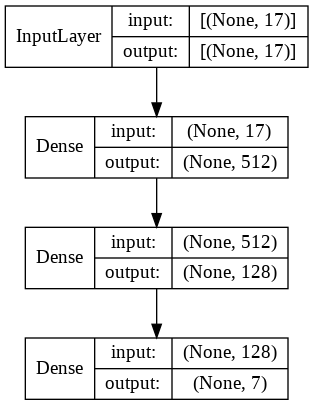

In [83]:
plot_model(model, to_file='model.png', show_shapes =True, show_layer_names = False)

In [84]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Train loss: 1.4478693008422852
Train accuracy: 0.45703125
Test loss: 2.9031097888946533
Test accuracy: 0.35384616255760193


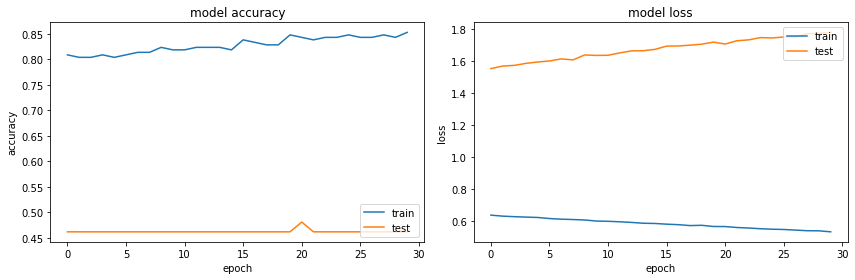

In [85]:
fig = plt.figure()
fig.set_size_inches(12, 4)
plt.subplot(1,2,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()
